In [1]:
%reload_ext autoreload
%autoreload 2

from src.dataset import KittiOdometryDataset
from src.utils import transform_cloud, project_cloud, random_transform
from src.visualization import plot_projection

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
config = {
    'base_path' : "/home/evouser/Workspace/Datasets/KITTI/",
    'sequences' : ['00', '01', '02', '03', '04']
}

dataset = KittiOdometryDataset(config)
data = dataset[np.random.randint(len(dataset))]

cloud = data['cloud']
image = np.array(data['rgb'])
extrinsic = data['extrinsic']
intrinsic = data['intrinsic']

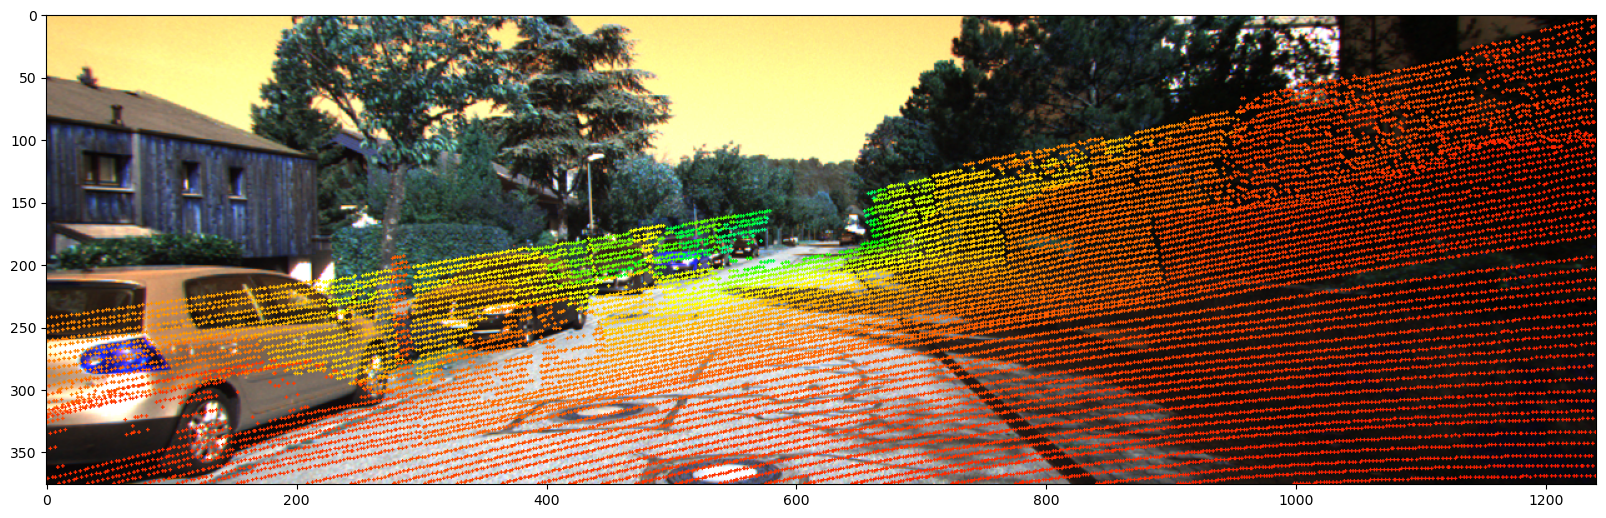

In [3]:
decalib = random_transform(10, 0, 0, 0, 0, 0)
cloud_camera = transform_cloud(cloud, extrinsic @ decalib)
cloud_projection = project_cloud(cloud_camera, intrinsic, image.shape)

plt.figure(figsize=(20, 10))
plt.imshow(plot_projection(image, cloud_projection))